# Lab 4: Using Supernovae Data to Demonstrate the Universe is Accelerating
Written by Andrea Lommen, Haverford College, March, 2018, edited for March 2020
with gratitude to Nobel Laureate Adam Riess for sharing his data.


## Goals of this lab

You will:

* Use Nobel Award winning supernovae data to demonstrate that the universe is not only expanding, but accelerating.
* Fit a curve to data.
* Understand slope and derivatives of functions.  In particular you'll connect results of np.polyfit to the familiar y = mx+b that many of you may remember.
* Understand polynomials.
* Connect the fitting of a curve of velocity vs distance to the acceleration of the universe
* Use residuals to judge how good a model fit is.
* Use approximations, and determine under what conditions they are true.
* Practice using read_csv again, setting the delimeter, renaming columns.
* be forced to be efficient in your code.  I've started to put limits on how many lines of code you write.  To stay within my limits you'll have to keep using "allSN" (which you'll create shortly) as an "object".  So when you want to use a particular column of allSN, for example "redshift" you'll need to use "allSN.redshift" without setting that equal to something else.
* spend some time _not_ writing functions, so you start to get wiser about when you need a function and when you don't. 

The data table found in /homes/astro/PHY104 is called
full_list6intmag.origsnls.zp.tex
and is from this manuscript, from which you should read the abstract, the introduction, and the text around the table we are using (Table 4) which includes
http://adsabs.harvard.edu/abs/2007ApJ...659...98R

Adam Riess and his collaborators won the Nobel Prize for this work. 

Watch his 27-minute Nobel lecture here:
https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/riess-lecture.html

### Step 1: Read in Adam's table into an object called "allSN", i.e.
Use a command like:
```
allSN = pd.read_csv(.....)
```
I've imported the libraries you need below.  Here are my hints about
using the pd.read_csv function. The file is called 
"/homes/astro/PHY104/full_list6intmag.origsnls.zp.tex"
You need to set delimiter equal to something 
(**delimeter = "?"**) to get this to work.  

Take a look at the file itself to see what character
you should use as the delimeter.  The easiest way to do that is open
up a terminal and say
```
more /homes/astro/PHY104/full_list6intmag.origsnls.zp.tex
```
From there the spacebar will advance the file and "q" will bring you back to the prompt.

(**Keep the command "more" in mind as you're working with the CSV's in your projects.**)

Finally, you need **header=None** in your list of what you pass
to read_csv because this file has no header.

Putting that all together, your read statement will look kinda
like this:
```
allSN = pd.read_csv("filename.blah.blah.blah", delimiter='?', header=None)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#(1)  Read in the CSV (1 point)
allSN = pd.read_csv("/homes/astro/PHY104/full_list6intmag.origsnls.zp.tex", delimiter='&', header=None)

In [3]:
#(2)
# See what it looks like! (Show the table) (1 point)
allSN    #returning the table 

,0,1,2,3,4,5
0,SN 90O,0.030,35.90,0.21,----,Gold \nl
1,SN 90T,0.040,36.38,0.20,----,Gold \nl
2,SN 90af,0.050,36.84,0.22,----,Gold \nl
3,SN 91ag,0.014,34.13,0.29,----,Gold \nl
4,SN 91U,0.033,35.53,0.21,----,Gold \nl
5,SN 91S,0.056,37.31,0.19,----,Gold \nl
6,SN 92al,0.014,34.12,0.29,----,Gold \nl
7,SN 92bo,0.017,34.70,0.26,----,Gold \nl
8,SN 92bc,0.018,34.96,0.25,----,Gold \nl
9,SN 92ag,0.026,35.06,0.25,----,Silver \nl


Let's take full advantage of the pandas table format by naming the columns appopriately.  The columns are name, redshift, mu, sigma, dots, and survey. Rename them and then display the table again.

In [4]:
#(3)
# Rename them "name", "redshift", "mu", "sigma", "dots", "survey"
allSN.columns=["name", "redshift", "mu", "sigma", "dots", "survey"] #renaming the columns
allSN           #returning the table with new columns names.

,name,redshift,mu,sigma,dots,survey
0,SN 90O,0.030,35.90,0.21,----,Gold \nl
1,SN 90T,0.040,36.38,0.20,----,Gold \nl
2,SN 90af,0.050,36.84,0.22,----,Gold \nl
3,SN 91ag,0.014,34.13,0.29,----,Gold \nl
4,SN 91U,0.033,35.53,0.21,----,Gold \nl
5,SN 91S,0.056,37.31,0.19,----,Gold \nl
6,SN 92al,0.014,34.12,0.29,----,Gold \nl
7,SN 92bo,0.017,34.70,0.26,----,Gold \nl
8,SN 92bc,0.018,34.96,0.25,----,Gold \nl
9,SN 92ag,0.026,35.06,0.25,----,Silver \nl


Note that all plots must have axis labels that include both the name of the variable being plotted and its units.  Redshift and distance modulus are weird because they're unitless, so no units are necessary for those two. I've put restrictions on the number of lines of code in each cell and you will receive a deduction for each extra line of code.  This does not include documentation.

First plot distance modulus ($\mu$) on the vertical axis, and redshift on the horizontal axis. Your plot should look like Figure 6 from the Riess et al paper! (A nice check.)  _Note, you only need 3 lines of code to do this, including the 2 lines to label the axis!  No need to convert anything to numpy arrays.  Just plot the columns versus each other! Neither distance modulus nor redshift has units._

Text(0,0.5,'distance modulus')

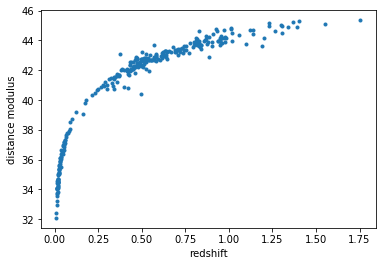

In [5]:
#(4) Plot distance modulus vs redshift.  Make sure it looks like Figure 6 from Riess et al paper.
# (2 points, to receive all the credit you must accomplish this is 3 lines of code)
plt.plot(allSN.redshift, allSN.mu, ".") #ploting redshift vs mu columns using dots
plt.xlabel("redshift")                 #labeling x-xis
plt.ylabel("distance modulus")         #labeling y-axis

Okay so that's totally fun (to be able to reproduce a plot from a Nobel prize winning paper!). Now we want to get distance from distance modulus.

The distance modulus $\mu_0$ to which the table refers (column name is "mu") is
the difference between the apparent and absolute magnitude
of the star:
$$
\mu_0 = m - M
$$
where m is the apparent magnitude and M is the absolute magnitude.

An object with a distance modulus of $0$ has a distance of 10 pc.  That's actually how absolute magnitude is defined.

$$
m - M = 5 \log d - 5 \\
\mu_0 = 5 \log d - 5
$$
$$
(\mu_0 + 5)/5 = \log d
$$
$$
d = 10^{\frac{\mu_0}{5} + 1}
$$

Use that last formula to calculate distance from the table.  Call it "d".  The formula above yields pc (parsecs). Convert your answer to Mpc (mega parsecs.) This should take at most 2 lines of code.

In [6]:
#(5) Calculate distance from distance modulus (no more than 2 lines of code) (2 points)
d= 10**( (allSN.mu/5) + 1 )    #calculating distance 
d=d/(10**6)                    #changing distance to mega parsecs

Now plot redshift vs distance.  Again you only need 3 lines of code including the two lines to label the axes.

Text(0,0.5,'distance (Mpc)')

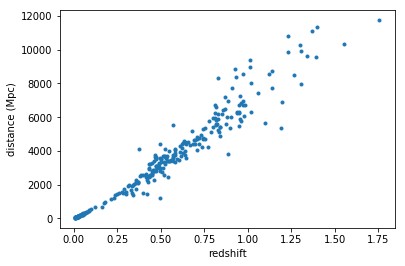

In [7]:
#(6) Plot redshift vs distance.  No more than 3 lines of code. (2 points)
plt.plot(allSN.redshift, d, ".") #ploting redshift vs distance using dots
plt.xlabel("redshift")          #labeling x-xis
plt.ylabel("distance (Mpc)")    #labeling y-axis

Is this what you expect?  That the redshift is higher for larger distances?  It's _really important_ that we do not expect a result like this unless the universe is expanding. I'm asking you to sort out for yourself the cause of distance being proportional to redshift. Large redshifts are _not caused_ by large distances, but rather by large velocities. Something could be close to you, and moving at large velocity, and it would indeed exhibit a large redshift.

#(7) Is this what you would expect? (2 points)  Explain why, making sure to avoid the pitfall I described above.
* ```Yes, this is what I expected. When the redshift is 1.75, the distance is close to 12,000Mpc. When the redshift is 0.25, the distance is close to 1,000Mpc. This confirms that the redshifts is higher for larger distances and lower for smaller distances.```

Now fit for Hubble's constant using these data. Using np.polyfit, fit a line (otherwise known as a 1st order polynomial) to the data. The redshift is your independent variable (the x in y=mx+b) and the distance is the dependent variable (the y in the y=mx+b). Let "p" be the name of the array in which you store what polyfit returns.  So "p = np.polyfit(.....".  (This is only one line of code.)

In [8]:
#(8) Use polyfit to fit a line to the data. (only one line of code) (1 point)
p = np.polyfit(allSN.redshift, d, 1)      #fitting a line using polyfit 

In [9]:
#(9)  Show the fitted parameters here (1 point)
p        #returning two parameters

array([7179.77034579, -232.36483816])

You really have no right to expect that that worked until you assess how well it worked.  So plot the fitted line on top of the data.

Some hints:

y = mx+b   <- that's the equation for a line most of us were taught at some point

The way np.polyfit does it
p[0] is the "m" and p[1] is the "b". redshift is the "x".

This should be 5 lines of code, including the two axis labels.

Text(0,0.5,'distance (Mpc)')

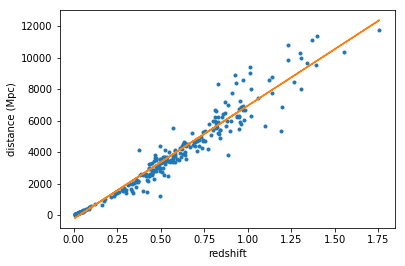

In [10]:
#(10) Plot the fitted line on top of the data, no more than 5 lines of code. (4 points)
bestline = p[0]*allSN.redshift + p[1]   #fit line equation
plt.plot(allSN.redshift, d, ".")        #ploting redshift vs distance using dots
plt.plot(allSN.redshift, bestline)      #plotting the bestline fit
plt.xlabel("redshift")                  #labeling x-xis
plt.ylabel("distance (Mpc)")            #labeling y-axis

Hubble's constant is known well.  It's about 72 km/s per Mpc.  Is that what you got?  Ack!!  I don't know!
_The slope of your graph is currently in Mpc per redshift._
So we need to get km/s on the vertical axis, and Mpc on the horizontal axis, then the slope of your line should be Hubble's
constant.  Getting distance from redshift turns out to be a little tricky....

## Relativistic relationship between velocity and redshift
In the last lab we used an approximation for the relationship between velocity and redshift ($v = zc$) that only works at relatively low velocities.  Low compared to what?  An excellent question.  Low compared the speed of light.  Notice that at redshift of $z=2$ using our formula $v = zc$ that the velocity is twice the speed of light.  This is in fact impossible, since nothing travels faster than the speed of light.  That is our big clue that we need an adjustment. Thankfully, Einstein figured out what the correct function was 100 years ago:  

Here's the precise formula (without the approximation):

$$
z = \sqrt{\frac{1+v/c}{1 - v/c}} -1
$$

And when you solve that for $v$ you get
$$
v = \frac{(z+1)^2 -1}{(z+1)^2+1}c
$$

* Write a function getv(z) which will return $v$ for any value of z we pass it. 

In [11]:
#(11) Create function getv(z) (3 points)
def getv(z):                           #creating a function with one variable
    c=3*(10**5)                        #creating a variabe c and assigning it to the speed of light
    v=( (( (z+1)**2) -1)/(( (z+1)**2) +1) ) *c      #formula for calculating velocity
    return(v)                          #returning velocity

Before we go using our function willy nilly we should check that it is correct. One way to check it is to show that for very large z (10 or more) the velocity getv returns is close to the speed of light. Do that below by creating an array of z's, call it _zarray_, from 0 to 10 increasing by an interval of 0.1.  Plot v vs zarray with axes labeled.  Do this with no loops, and no more than 4 lines of code (not including documentation). _Hint: Don't forget you can call your function on a whole array. Another hint: Here are the 4 lines: (1) define zarray, (2) plt.plot (3) plt.xlabel (4) plt.ylabel

Text(0,0.5,'velocity(km/s)')

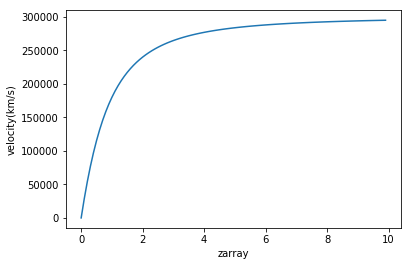

In [12]:
#(12) Use getv() to make a plot (3 points
zarray=np.arange(0, 10, 0.1)        #defining zarray
plt.plot(zarray, getv(zarray))      #ploting velocity vs zarray
plt.xlabel("zarray")                #labeling x-xis
plt.ylabel("velocity(km/s)")        #labeling y-axis

Explain what your graph shows.  In other words, from looking at this graph, how do you know your function is working correctly?  (Some hints: comment on its behavior when z is small (0-1) and on its behavior when z is large (8-10).  Explain how those two behaviors reassure you that your function is working properly.)

#(13) Explain what your graph shows. (1 point)
* ```My function is working correctly because the velocity for smaller z values is lower than the velocity for larger z values. That is, the velocity for z values 0-1 is less than 100,000 kms/s while the velocity for z values 8-10 is close to to 300,000kms/s(speed of light).```

We should check whether it returns the expected value for small $z$.  In other words, we expect that for small $z$ our old relationship $v = cz$ still holds.

Reproduce the same plot as above, but add a line corresponding to $v=cz$. Make sure your new plot maintains the same axes limits as the previous one. This should add at most three lines of code to the above (one for the new plt.plot, two to set plt.xlim and plt.ylim).

(0, 300000)

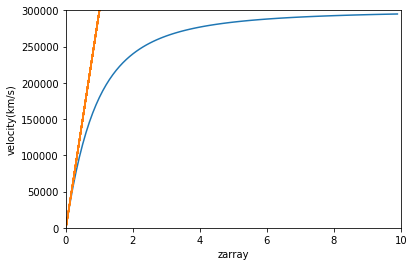

In [13]:
#(14)  Plot v=cz on top of the plot you showed in #12. (5 points)
zarray=np.arange(0, 10, 0.1)        #defining zarray
plt.plot(zarray, getv(zarray))      #ploting velocity vs zarray
plt.xlabel("zarray")                #labeling x-xis
plt.ylabel("velocity(km/s)")        #labeling y-axis

plt.plot(allSN.redshift, (allSN.redshift*(3*(10**5)))) #new plot for v=cz
plt.xlim(0,10)                      #adding the x limit
plt.ylim(0,(3*(10**5)))             # adding the y limit

#(15) Based on the graph above, for how high a velocity does $v=zc$ hold true? What fraction of the speed of light is that?
(2 points) 
* ``` v=cz hold true up to a point where v is close to 50,000 km/s. The fraction of the speed of light is 50,000km/s/300,000km/s which equals to 1/6. ```

Now that we've figured out how to get distance, let's go back to figuring out Hubble's constant.  Hubble's "constant" is in km/s per Mpc, so we want km/s on the vertical axis, and Mpc on the horizontal axis.  That way the slope of our graph will be Hubble's constant.

Make this plot using your function getv to get the velocities.  Please call velocity "velocity".  _Hint:  This is only 4 lines of code, including 2 lines to label your axes._


Text(0,0.5,'velocity(km/s)')

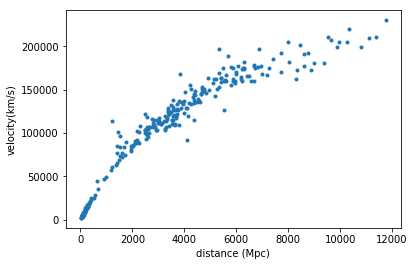

In [14]:
#(16) Plot velocity vs distance. 4 lines of code. (3 points)
velocity = getv(allSN.redshift)    #calling the function getv()
plt.plot(d, velocity, ".")         #ploting velocity vs distance using dots
plt.xlabel("distance (Mpc)")       #labeling x-xis
plt.ylabel("velocity(km/s)")       #labeling y-axis

#(17) Describe how you can already see Hubble's constant decreasing as you look at farther away supernovae. Hint: If Hubble's "constant" were the same for all distances, this would be a straight line. (1 point)


* ``` As you look at farther away supernovae, the curve/line becomes more gentle and scattered as distances increases. Since Hubble constant is the slope of velocity(km/s) vs distance(Mpc) curve, it will be decreasing as this curve/line becomes more gentle. ```

Fit a line to these data, and see what its slope is.  The slope should be a reasonable guess at Hubble's constant. (The Hubble's constant we get this way will be too small, for the reason you described just above.)  Use np.polyfit with a "1" for its last argument to indicate a first order polynomial.  Set "p" (for parameters") equal to your np.polyfit call, and then show what p is. This is 2 lines of code.

In [15]:
#(18) Fit to a line and show p. 2 lines of code. (2 points)
p = np.polyfit(d, velocity, 1)     #fiting a line
p                                  #returning parameters 

array([2.19249427e+01, 2.84434085e+04])

Look up the value of Hubble's constant on the web and see if you think that's at least in the ballpark of what we expected.  (Be generous, we know we'll get a lower value than what's on the web, but it shouldn't be 10x lower!).  Comment here on whether your value is in the right ballpark, and also say what units your H is in. (Hint: Look the units on the axis of your plot and consider that slope is change in y over change in x.)  By the way, when astronomers say that something is in the right ballpark, they usually mean is it the same "order or magnitude".  By "order of magnitude" we mean that if you write it in scientific notation (eg $3.5 \times 10^8$) that the exponent is the same.  In other words $1.2 \times 10^8$ is the same order of magnitude as $3.5 \times 10^8$.


#(19) Is my value in the right ballpark?  (1 point)
* ``` Yes my value is in the right ballpark. This is because the normal Hubble constant, in scientific notationis, is close to 7.2 x 10^1 km/s per Mpc and my Hubble constant is 2.19 x 10^1 km/s per Mpc. Both of this values are in the same magnitude where the exponent is 1(10^1). My hubble constant units is km/s per Mpc . ``` 

## Overplotting the fit
In order to see if the fit turned out right, we should plot it over the top of our data points.  Do that here using the parameters "p" and the notes from class on polynomials.  Please call the fitted velocity "fitted_velocity." _Hint: This should only take 5 lines of code including the 2 for labeling the axes.

Text(0,0.5,'velocity(km/s)')

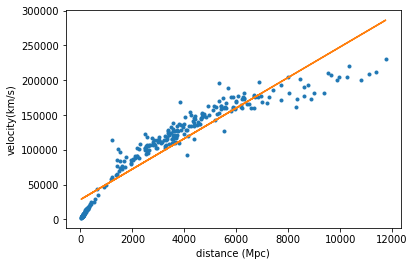

In [16]:
#(20) Plot our fit over the data (5 lines of code) (4 points)
fitted_velocity=p[0]*d + p[1]      #fit_velocity line equation
plt.plot(d, velocity, ".")         #ploting velocity vs distance using dots
plt.plot(d, fitted_velocity)       #ploting best fit line
plt.xlabel("distance (Mpc)")       #labeling x-xis
plt.ylabel("velocity(km/s)")       #labeling y-axis

If you did this "right" you'll notice the line doesn't fit very well.  It does follow the general trend, but the data kinda snake around it.  Let's try some more experimentation with this idea that perhaps Hubble's "constant" is changing.

What Hubble's 'constant' do you get for the closer supernovae (d < 6000 Mpc) and the farther supernovae (d > 6000 Mpc)  _Hint: Based on Adam's lecture where would you expect to find the largest value of Hubble's 'constant?'  Also, I used np.where to do this, and apparently np.where needs np.arrays, so convert both d and velocity to np.arrays. Please convert them "in place" so they are still called
"d" and "velocity"._ 

You should print your value of Hubble's constant in a complete sentence.


The value of the Hubble's constant is 29.237815600044808 .


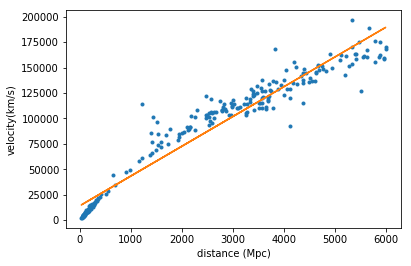

In [17]:
#(21a) Find hubble's constant for the closer (d<6000 Mpc) supernovae. (4 points)
# No more than 12 lines of code here.

d = np.array(d)                     #converting distance to an array
velocity = np.array(velocity)       #converting velocity to an array
closerd = np.where(d < 6000)        #positions of distances less than 6000Mpc
newcloserd = d[closerd]             #distances less than 6000Mpc
closervelocity = velocity[closerd]  #velocities where distance is less than 6000Mpc
pcloser = np.polyfit(newcloserd, closervelocity, 1) #1st polynomial polyfit

closerbestline = pcloser[0]*newcloserd + pcloser[1] #fit line equation
plt.plot(newcloserd, closervelocity, ".")           #ploting closervelocity vs closerdistance using dots
plt.plot(newcloserd, closerbestline)                #ploting best fit line
plt.xlabel("distance (Mpc)")                        #labeling x-xis
plt.ylabel("velocity(km/s)")                        #labeling y-axis

print("The value of the Hubble's constant is", pcloser[0], ".") #printing Hubble constant in a statement

The value of the Hubble's constant is 8.706066692698274 .


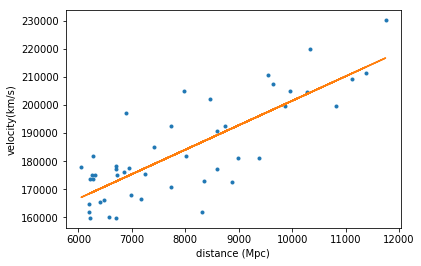

In [18]:
#(21b) Find hubble's constant for the closer (d>6000 Mpc) supernovae. (4 points)
# No more than 10 lines of code (because you already converted
# d and velocity into np.arrays in the cell above)

furtherd = np.where(d > 6000)                   #positions of distances more than 6000Mpc
newfurtherd = d[furtherd]                       #distances more than 6000Mpc
furthervelocity = velocity[furtherd]            #velocities where distance is more than 6000Mpc
pfurther = np.polyfit(newfurtherd, furthervelocity, 1)    #parameters for the equation

furtherbestline = pfurther[0]*newfurtherd + pfurther[1]    #fit line equation
plt.plot(newfurtherd, furthervelocity, ".")                #ploting newfurtherdistance vs furthervelocity curve using dots
plt.plot(newfurtherd, furtherbestline)                     #ploting best fit line
plt.xlabel("distance (Mpc)")                               #labeling x-xis
plt.ylabel("velocity(km/s)")                               #labeling y-axis

print("The value of the Hubble's constant is", pfurther[0], "." ) #printing hubble constant in a statement

Summarize what you learned from the two plots above. What were your two values of the Hubble constant from the two plots.  Be sure to quote units on your answers.

#(22) What were your two values of the Hubble constant above (in correct units), and what did you learn from them?
Suggested answer: (3 points)
* ```Hubble constant for d< 6000Mpc is 29.237815600044808 km/s per Mpc ```
* ```Hubble constant for d> 6000Mpc is 8.706066692698274 km/s per Mpc```


```From these two values, the Hubble Constant for d < 6000Mpc is larger than that for d > 6000Mpc. The larger value of Hubble constant will then be found at d < 6000Mpc. This confirms the earlier argument that Hubbles constant decreases as you look at farther away supernovae. ```

# Did you notice that our line is doing a pretty bad job of modeling the data? 

One way to determine that is to plot the "residuals" of the fit.  "Residuals" are a fancy word for the difference between the model and the data. 

Plot the residuals resulting from fitting a line to the entire data set.

_Hint: because you have already plotted the fitted line (at the top of the section called "Overplotting the fit"), you only at most one more line of code to plot the residuals. So take your 5 lines of code from there and add no more than one line. The residuals are the original velocities minus the fitted velocities._

_Hint2: The y-axis should be labeled "residual velocity (km/sec)"_


Text(0,0.5,'residual velocity(km/sec)')

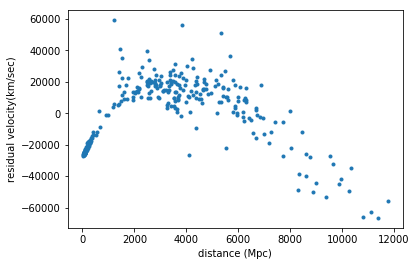

In [19]:
#(23) Plot the residuals resulting from fitting a line to the entire data set. No more than 6 lines of code. 
# (4 points)
fitted_velocity=p[0]*d + p[1]           #fit line equation
residuals=velocity-fitted_velocity      #calculating residuals
#plt.plot(d, velocity, ".")             #ploting velocity vs distance
plt.plot(d, residuals, ".")             #ploting distance vs residuals
plt.xlabel("distance (Mpc)")            #labeling x-xis
plt.ylabel("residual velocity(km/sec)") #labeling y-axis

If you've done this right, you should see residual velocities that run from about -60,000 km/sec to 60,000 km/sec. 

#(24) Why are some of the residuals negative? (1 point)
* ```When you plot the fitted velocity fit line on the same graph with distance vs velocity, some velocity values will be found below the fitted velocity line. This means that fitted velocity values at these distances are greater than the corresponding velocity values. Since residuals equals velocity minus fitted velocity, it will therefore be negative when fitted velocity is more than velocity.``` 

#(25) What would you expect this residual plot to look like if the line fit the data well? (1 point)

* ``` I expected these residuals not to be curved because a curve means that the residual velocities will be negative for a given interval of distances and positive for others. That said, I expect to see negative and positive residual velocities that are uniformily distributed in all distances. This makes it possible for all the points to have the same or close slope(Hubble Constant).```

It looks like we need some sort of curved function. What we can do is use a 2nd or 3rd order polynomial instead of just a 1st order.
Yes, and then the derivative of the polynomial at everypoint is Hubble's constant.  That's pretty fun!  

So now, going back to the whole data set, fit the whole data set to a 2nd order polynomial (by changing one number in the call to polyfit).  Also plot the fitted curve as you did before. 

Hint: This should require 2 changes to your previous code, and zero additional lines of code. The most significant adjustment will be in the calculation of "fitted\_velocity." No more than 6 lines of code here.

Text(0,0.5,'velocity(km/sec)')

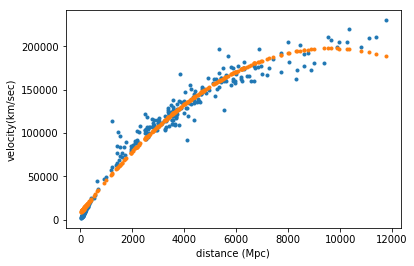

In [20]:
#(26) Fit the supernovae data to a 2nd order polynomial and plot the fitted curve on top of the data.( 5 points)
p = np.polyfit(d, velocity, 2)  #2nd order polynomial 
second_fitted_velocity=p[0]*(d**2) + p[1]*d + p[2] #fit line equation
plt.plot(d, velocity, ".")                #ploting velocity vs distance using dots
plt.plot(d, second_fitted_velocity, ".")  #ploting best fit line
plt.xlabel("distance (Mpc)")              #labeling x-xis
plt.ylabel("velocity(km/sec)")            #labeling y-axis

How do you think the residuals will look now?  First jot some notes to yourself on a piece of paper and then plot them below.

Text(0,0.5,'residuals velocity(km/sec)')

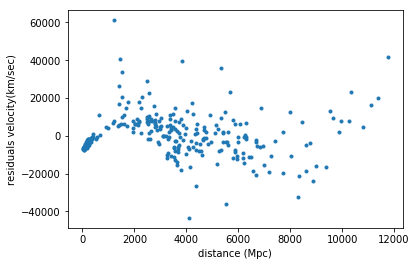

In [21]:
#(27)  Plot residual velocity vs distance.(4 points)
second_fitted_velocity=p[0]*(d**2) + p[1]*d + p[2] #fit line equation
residuals=velocity-second_fitted_velocity  #calculating residuals
#plt.plot(d, velocity, ".")                #ploting velocity vs distance using dots
plt.plot(d, residuals, ".")                #ploting distance vs residuals
plt.xlabel("distance (Mpc)")               #labeling x-xis
plt.ylabel("residuals velocity(km/sec)")   #labeling y-axis

#(28) Do they look different from what you expected?  How or how not? (2 points)
* ``` It is slightly different from what I expected. I expected to see uniform distribution of positive and negative residual velocities on all distances, such that, the number of negative residual velocities equals to that of positive residual velocities on all distance intervals. For this plot, the residual velocities for distances from 10000Mpc to 12000Mpc are mainly positive while those from 0Mpc to 500Mpc are mainly negative. Therefore, these model doesn't fit the data well. ```

#(29) Based on the residuals, would you say the model fits the data well?  Why or why not? (1 point)
* ```No, the model doesn't fit the data well. For larger distances from 10000Mpc to 12000Mpc, the residual velocites are mainly positive. However, for distances from 0Mpc to 500Mpc, the residual velocites are mainly negative. Therefore, the residual velocities are not uniformly distributed in all the distance intervals. As a result, this model does not fits the data well for all the distance intervals.```

Let's try a 3rd order polynomial. Again, plot the whole range of data, and show your fitted 3rd order polynomial on top of it. _No more than 6 lines of code, including axis labels._

Text(0,0.5,'velocity(km/sec)')

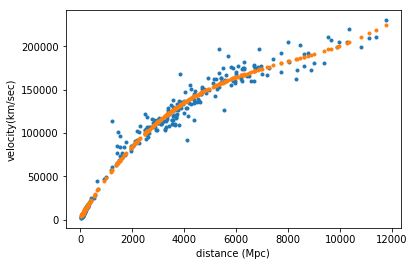

In [22]:
#(30) Fit 3rd order polynomial and again overplot the fit on the data. (5 points)
p = np.polyfit(d, velocity, 3)
third_fitted_velocity=p[0]*(d**3) + p[1]*(d**2) + p[2]*d+ p[3] #fit line equation
plt.plot(d, velocity, ".")          #ploting velocity vs distance using dots
plt.plot(d, third_fitted_velocity, ".")  #ploting best fit line
plt.xlabel("distance (Mpc)")        #labeling x-xis
plt.ylabel("velocity(km/sec)")      #labeling y-axis

Did you notice that the 3rd order polynomial does a better job of taking care of the data at large distance?  (rhetorical question). Please again plot the velocity residuals.

Text(0,0.5,'residual velocity(km/sec)')

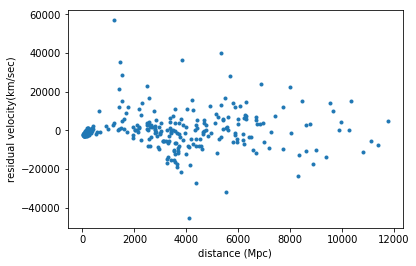

In [23]:
#(31) Plot the residuals (residual velocity vs distance) (4 points)
third_fitted_velocity=p[0]*(d**3) + p[1]*(d**2) + p[2]*d + p[3] #fit line equation
residuals=velocity-third_fitted_velocity   #calculating residuals
#plt.plot(d, velocity, ".")             #ploting velocity vs distance using dots
plt.plot(d, residuals, ".")             #ploting distance vs residuals
plt.xlabel("distance (Mpc)")            #labeling x-xis
plt.ylabel("residual velocity(km/sec)") #labeling y-axis

#(32) Comment on whether those residuals indicate that this model is a better fit to the data.(1 point)
* ``` Yes, these residual indicate that this model is a better fit to the data. Residual velocities are distributed uniformly in all distance intervals. On all distances, the number of positive and negative residual velocities appear to be equal. This means that if you draw a fit line, the line will fit in well to the data.```

As we talked about in class, we now have an equation that tells us the relationship between velocity and distance anywhere in the universe. The equation is:
$$
velocity = p[0]D^3 + p[1]D^2 + p[2]D + p[3]
$$
where $p$ is the array of parameters that the polyfit function returned.

The tangent to that function is Hubble's "constant" anywhere in the universe.  Please recall that the tangent to any function is its derivative.

One fun thing about a polynomial is that you can easily take the derivative of it.

In the cell below, write the derivative of velocity.  I've started it for you, but you need to finish it.  Feel free to ask me or Dave or TAs for a reminder about derivative rules.


$$
\frac{dv}{dD} = 3p[0]D^2 + 
$$

#(33) (Your answer for derivative of velocity here.) (2 points)
* ```The derivative is```$$ \frac{dv}{dD}= 3p[0]D^2 + 2p[1]D +p[2]$$

So that function $\frac{dv}{dD}$ that you wrote out above is actually the value of Hubble's "constant" anywhere in the universe.   Call it H (for Hubble) and plot H as a function of D.  You already know what you expect it to look like vaguely, right?  It should be larger for small distances, and smaller for large distances.  Make sure to label the axes of your plots with the appropriate units. _Hint: This should only take 4 lines of code, including axis labels._

Text(0,0.5,'Hubble constant(km/s per Mpc)')

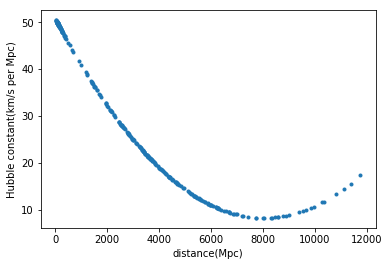

In [24]:
#(34) Plot Hubble's constant vs distance. (3 points)
H=3*p[0]*(d**2) + 2*p[1]*d + p[2]              #creating hubble variable 
plt.plot(d, H, ".")                            #ploting hubble vs distance
plt.xlabel("distance(Mpc)")                    #labeling the x-axis
plt.ylabel("Hubble constant(km/s per Mpc)")    #labeling the y-axis

That's an awesome plot!!   Before I make you comment on it, let's put the x-axis into some more useful units. Instead of distance, astronomers like to think in terms of "look-back time".  In other words, how far back in time are we looking when we look at 8000 Mpc
(for example)?  This turns out to be more complicated that just converting distances into light years, because of the expanding and accelerating universe. There's a library called "astropy" that we can use to do this work for us. It turns out that in order to calculate lookback time you have to choose which version of the universe you believe.  For our purposes we will choose the parameters determined by Planck13.  Planck is a satellite that measured the temperature and polarization of the Cosmic Microwave Background. 

http://docs.astropy.org/en/stable/cosmology/

(You don't necessarily need to look at that page, but I include it in case you are curious.)

First import the library:

In [25]:
from astropy.cosmology import Planck13  # Planck 2013
from astropy import units as u # a pretty fancy way
# keeping track of units
from astropy.cosmology import z_at_value
# And here is how you calculate the lookback time at 
# redshift 2
Planck13.lookback_time(2)

<Quantity 10.51184138 Gyr>

So the answer above says that at a redshift of 2 the lookback time is 10.5 Gyr (or 10.5 billion years.) The universe is only 14 billion years old, so this is most of the way back.

In [26]:
# Now we need to find the value of the redshift z at each of 
# our distance moduli, allSN.mu.
# I included all this here in case you're interested, but feel
# free to skip to the last line of this cell where I calculate
# the lookback time for each of our supernovae.

# To do this I'm using a linear interpolation function 
# using suggestions I found here:
# https://het.as.utexas.edu/HET/Software/Astropy-0.4.2/...
#          api/astropy.cosmology.z_at_value.html

# Create a grid of z's logarithmically distributed
# that covers the redshift range from 0.02 to 2
zgrid = np.logspace(np.log10(0.02), np.log10(2))
# Calculate all the distance moduli for all the z's in the grid
Dgrid = Planck13.distmod(zgrid)
# Finally interpolate to find the redshift at each distance modulus:
zvals = np.interp(allSN.mu, Dgrid.value, zgrid)
# Now to find the lookback time, we put those 
# redshift values into
# the lookback_time attribute of our chosen cosmology
lookback = Planck13.lookback_time(zvals)

And now make the sample plot as above, but this time plot Hubble's "constant" vs lookback time. Be sure to label your axes, including units. (3 lines of code, including axis labels.)  For lookback time just use "lookback" because I set it up for you already in the cell above, i.e. you don't have to calculate it. 

Text(0,0.5,'Hubble constant(km/s per Mpc)')

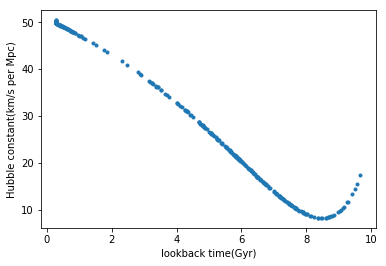

In [27]:
#(35) Plot Hubble's constant vs lookback time.  (2 points)
plt.plot(lookback, H, ".")                   #ploting lookback vs hubble
plt.xlabel("lookback time(Gyr)")             #labeling the x-axis
plt.ylabel("Hubble constant(km/s per Mpc)")  #labeling the y-axis

#(36) Based on your graph, what was Hubble's constant (with appropriate units) 2 billion years ago? 6 billion years ago?  10 billion years ago? (3 points)
* ``` 2 billions years is  43 km/s per Mpc ```
* ``` 6 billions years is  20 km/s per Mpc ```
* ``` 10 billions years- there is no value of Hubble constant on the graph that corresponds to 10 billion years. This means that hubble constant was very small at this time and was not measured.```

Here's a good question that you might have:

Why didn't we just use our redshift values from the table to find the lookback time?

You can do that!  You just say:

lookback = Planck13.lookback_time(allSN.redshift)

Feel free to try that, but I'm not assigning it.

It turns out this gives a much more scattered plot than the way we just did it - by using the distance moduli to get the lookback
time.  In other words, our distance measurements are more accurate than our redshift measurements, so it was better to base lookback time on distance.

Text(0,0.5,'Hubble constant(km/s/Gyr)')

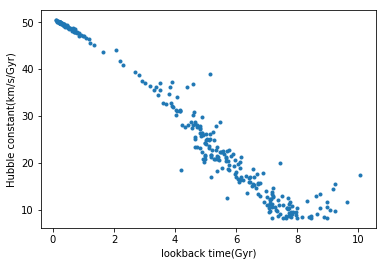

In [28]:
newlookback=Planck13.lookback_time(allSN.redshift)
plt.plot(newlookback, H, ".")
plt.xlabel("lookback time(Gyr)")
plt.ylabel("Hubble constant(km/s/Gyr)")

## Caveats
We swept some things under the rug in order to keep this lab from going off the rails. (Sorry for mixing metaphors.)

- Now that we know that Hubble's 'constant' is changing, it turns out that we actually needed to do an integral to get the distance:

$$
d= c(1 + z)\int_0^z \frac{du}{H(u)}
$$

Using that expression for distance would subsequently change the value of Hubble's "constant" significantly in the early universe. Our analysis showed that it changed by almost a factor of 10. In more rigorous calculations it only changes by about a factor of 2. However, the calculation we did maintains the character of the effect very well.

- You may have noticed that we didn't even get the accepted value of the current Hubble's constant correct. It is about 70 km/sec per Mpc right now. (There's actually a controversy over whether it's 68 or 72 km/sec per Mpc. From looking at supernovae (as we did here) researchers get 72 km/sec per Mpc.  From looking at the anisotropy in the microwave background researchers get 68 km/sec per Mpc.)  The reason we didn't get 70 km/sec is that Riess and colleagues don't care about the intrinsic brightness of the supernovae they are using as standard candles. In other words, even though they are using a standard candle to do all this analysis, the actual brightness of the standard candle doesn't enter into their calculations. So toward the beginning of the lab when I wrote the relationship between distance and distance modulus, 
$$
d = 10^{\frac{\mu_0}{5} + 1}
$$
the $\mu_0$ has an arbitrary but constant offset in it. Feel free to play around with this and see how it changes your values of Hubble's constant. (Just for fun. Not required.) I found that adding -.75 to $\mu_0$ got me closer to the modern value of Hubble's constant.

## Three last very important questions
Sometimes doing labs with a lot of challenging instructions like this one, you lose the forest for the trees.  Take a moment and try to see the forest and write it down here.  More specifically, answer these questions:
(2 points each)
- Why are supernovae useful for measuring the history of our universe?
- What is Hubble's law, and what does it mean that we measured the "constant" to be changing over time?
- Explain in words why we fit a plot of velocity vs distance to a polynomial, and then took the derivative of that polynomial to find Hubble's 'constant' as a function of time.

#(37) The three questions above (2 points for each question, so 6 points total)

**Question 1**
* ```As you look at farther supernovae, the value of the hubble constant is decreasing. Towards nearer supernovae(small distances), hubble constant is increasing. At the same time, if you lookback at time, the value of hubble constant is smaller for farther billion years but larger for nearer billion years. Therefore, supernovae(distances) has been increasing with time. This shows that the universe has been expanding with time. As time goes by, the universe continue to expand hence the distance(supernovae)increases. As a results the hubble constant descreases. That said, supernovae are realy useful in measuring how the universe has been expanding over the years.```     

**Question 2**
* ```Hubble's law is the observation in cosmology that galaxies are moving away from the Earth at a velocity which is proportional to their distance. That is, a galaxy which is farther away from the earth is moving at its fastest velocity. Hubble constant is the slope of velocity kms/s vs distance (Mpc). As time goes by, the universe has been expanding which causes and increase in distance. Since Hubble constant depends on both velocity and distance, it will change when these variables change. This illustrates why the constant has been changing over time.```

**Question 3**
* ```Hubble constant is measured in kms/s per Mpc and it's the slope of velocity (km/s) vs distance(Mpc). Fitting a line to this data results to a more accurate slope for the data which is hubble constant. Again, it is hard to calculate a slope when the data is large and distributed in different positions hence ploting a fit line eases this calculation. Hubble constant is also the derivative of a polynomial where velocity is the dependent variable(y) and distance is the independent variable(x). Since the universe has been expanding with time, both distance and time has been increasing. Therefore, the relationship between distance and Hubble constant is the same as that for time and Hubble constant. Same as distance, hubble constant is smaller for longer time and larger for shorter time. This illustrates why hubble constant was plotted against time.```

# Congratulations
You have finished lab #4. You have really learned a lot of astronomy and a lot of programming. If it seems like your brain hurts that's because it's growing. 